### Load the image (opera_house.jpg) 

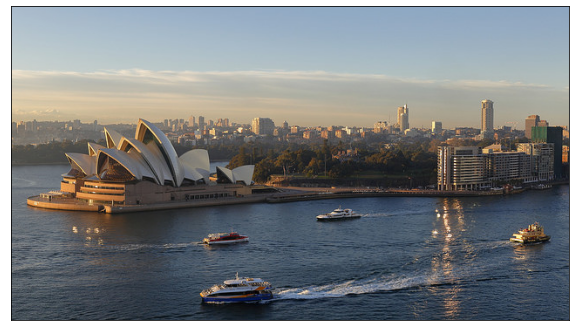

In [1]:
from PIL import Image,ImageOps  
import matplotlib.pyplot as plt
import numpy as np

opera= Image.open('Sydney-Opera-House.jpg')
plt.figure(figsize = (10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(opera)

### Convert it into grayscale

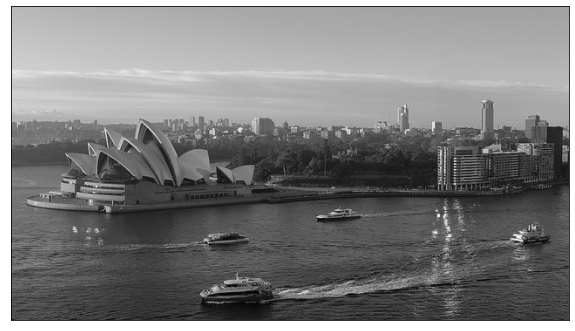

In [2]:
# converting to gray scale 
gray_img = ImageOps.grayscale(opera)
plt.figure(figsize = (10,10))
plt.xticks([]), plt.yticks([])
plt.imshow(gray_img,cmap = "gray")

### Make Convolution function 

In [3]:
#calculatint the final input shape 
def getOutputShape(x,kernel_size):  
    kernel_size = 3 
    new_width = x[0] - kernel_size + 1 
    new_height = x[1] - kernel_size + 1
    print("Input height : ",x[0]," Output height : ",new_width)
    print("Input width : ",x[1]," Output width : ",new_height)
    return new_width,new_height 
getOutputShape(gray_img.size,3)

### convolution function 
def conv(img,kernel):
    #converting image to numpy array. 
    img = np.asarray(img)
    
    #calculate the new shape 
    kernel_size = kernel.shape[0]
    new_shape = getOutputShape(img.shape,kernel_size)
    
    #output image array.
    out = np.zeros(shape = new_shape)
    
    for x in range(out.shape[0]):
        for y in range(out.shape[1]):
            sum = 0
            for i in range(kernel.shape[0]):
                for j in range(kernel.shape[1]):
                    sum += img[x+i][y+j] * kernel[i][j]
            # the below lines does 2 things
            # mods sum remember only +ve values of pixels are allowed 
            # it also takes core that the pixel
            sum = np.abs(sum)
            if sum > 255.: 
                sum = 255.0
            out[x,y] = sum                    
    return np.round(out)

Input height :  640  Output height :  638
Input width :  360  Output width :  358


### Stronger Brighten The Image with kernel of:
    ### [ [0   0.2   1]
          [0.2 0.4 0.2] 
          [0   0.2   0]] 

Input height :  360  Output height :  358
Input width :  640  Output width :  638


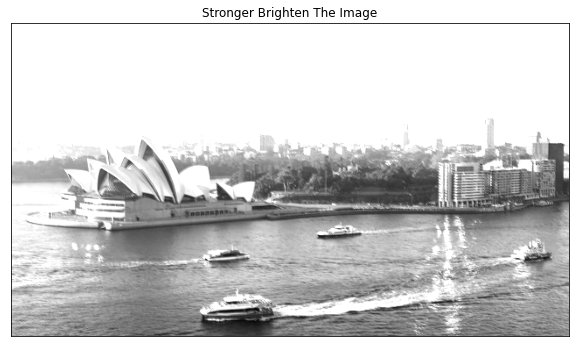

In [4]:
# convolution image 1. 
kernel_1 = np.array([[1,0.2,0],[0.2,0.4,0.2],[0,0.2,0]])
output_image_1 = conv(gray_img,kernel_1)
plt.figure(figsize = (10,10))
plt.title('Stronger Brighten The Image')
plt.xticks([]), plt.yticks([])
plt.imshow(output_image_1,cmap = "gray")

### Stronger Blurring The Image with kernel of:
    ### [ [0.1 0.1 0.1]
          [0.1 0.1 0.1] 
          [0.1 0.1 0.1]] 

Input height :  360  Output height :  358
Input width :  640  Output width :  638


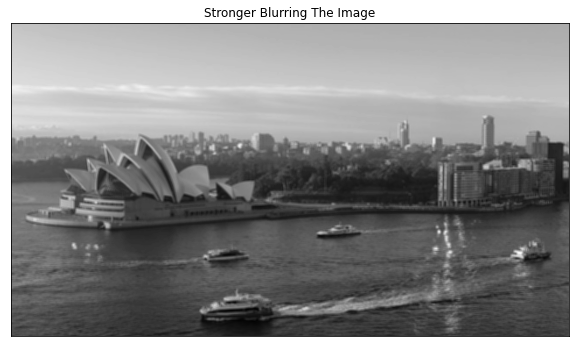

In [5]:
# convolution image 2. 
kernel_2 = np.array([[0.1,0.1,0.1],[0.1,0.1,0.1],[0.1,0.1,0.1]])
output_image_2 = conv(gray_img,kernel_2)
plt.figure(figsize = (10,10))
plt.title('Stronger Blurring The Image')
plt.xticks([]), plt.yticks([])
plt.imshow(output_image_2,cmap = "gray")

### Stronger Darken The Image with kernel of:
    ### [ [0  0 1]
          [0 -2 0] 
          [1  0 0]] 

Input height :  360  Output height :  358
Input width :  640  Output width :  638


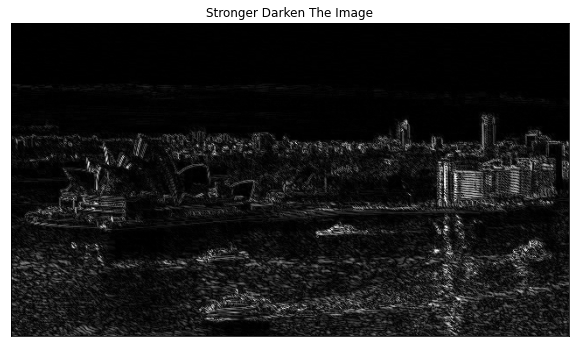

In [6]:
# convolution image 3. 
kernel_3 = np.array([[1,0,0],[0,-2,0],[0,0,1]])
output_image_3 = conv(gray_img,kernel_3)
plt.figure(figsize = (10,10))
plt.title('Stronger Darken The Image')
plt.xticks([]), plt.yticks([])
plt.imshow(output_image_3,cmap = "gray")

### Filter Result with kernel of:
    ### [ [0.1 0.1 0.1]
          [0.1 0.1 0.1] 
          [0.1 0.1 0.1]] 

Input height :  360  Output height :  358
Input width :  640  Output width :  638


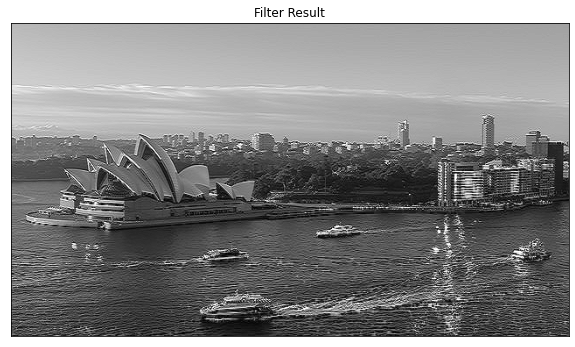

In [7]:
# convolution image 4. 
kernel_4 = np.array([[0,-1,0],[0,3,0],[0,-1,0]])
output_image_4 = conv(gray_img,kernel_4)
plt.figure(figsize = (10,10))
plt.title('Filter Result')
plt.xticks([]), plt.yticks([])
plt.imshow(output_image_4,cmap = "gray")